### 필수과제1

In [2]:
import pandas as pd

In [3]:
variables = pd.read_csv('data_info.csv')
variables

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [4]:
traffic = pd.read_csv('jeju_traffic.csv')
traffic

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [17]:
len(traffic['road_name'].unique())

61

### 도로의 종류가 많으므로 변동폭이 가장 큰 도로를 기준으로 분석한다.

In [13]:
traffic.groupby('road_name').agg(speed_var = ('target','var')).sort_values(by='speed_var')

,speed_var
road_name,
지방도1115호선,11.392010
애원로,16.815618
관광단지1로,17.601619
동문로,20.098585
연북로,21.296355
...,...
고평교,207.188692
일반국도11호선,211.239704
중산간서로,212.278501


- 첨단로가 가장 평균속도의 분산이 크다. 따라서 첨단로를 기준으로 데이터를 분석한다.

In [59]:
df = traffic[traffic['road_name'] =='첨단로'].reset_index()
df

,index,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,468,TRAIN_0000468,20211202,목,17,2,107,첨단로,0,0,...,0,월평교앞교차로,33.471476,126.570140,없음,동샘교차로,33.467989,126.569885,있음,16.0
1,589,TRAIN_0000589,20211231,금,6,2,107,첨단로,0,0,...,0,월평교앞교차로,33.471476,126.570140,없음,동샘교차로,33.467989,126.569885,있음,27.0
2,628,TRAIN_0000628,20220531,화,13,2,107,첨단로,0,0,...,0,월평교앞교차로,33.471476,126.570140,없음,동샘교차로,33.467989,126.569885,있음,14.0
3,969,TRAIN_0000969,20220510,화,1,2,107,첨단로,0,0,...,0,동샘교차로,33.467989,126.569885,있음,월평교앞교차로,33.471476,126.570140,없음,48.0
4,1828,TRAIN_0001828,20220115,토,14,2,107,첨단로,0,0,...,0,영평동2151,33.460290,126.569870,없음,영평동2150-6,33.460785,126.569400,없음,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16679,4700266,TRAIN_4700266,20220127,목,0,2,107,첨단로,0,0,...,0,월평교앞교차로,33.471476,126.570140,없음,동샘교차로,33.467989,126.569885,있음,33.0
16680,4700289,TRAIN_4700289,20211202,목,20,2,107,첨단로,0,0,...,0,월평교앞교차로,33.471476,126.570140,없음,동샘교차로,33.467989,126.569885,있음,23.0
16681,4700392,TRAIN_4700392,20220313,일,23,2,107,첨단로,0,0,...,0,월평교앞교차로,33.471476,126.570140,없음,동샘교차로,33.467989,126.569885,있음,28.0
16682,4700762,TRAIN_4700762,20220712,화,21,2,107,첨단로,0,0,...,0,동샘교차로,33.467989,126.569885,있음,월평교앞교차로,33.471476,126.570140,없음,40.0


In [23]:
print(df['base_date'].min())
print(df['base_date'].max())

20211201
20220731


In [49]:
rain = pd.read_csv('강수량_제주시.csv',encoding='cp949')
temp = pd.read_csv('기온_제주시.csv',encoding='cp949')

In [50]:
rain

,날짜,지점,강수량(mm)
0,2021-12-01,184,1.0
1,2021-12-02,184,1.1
2,2021-12-03,184,NaN
3,2021-12-04,184,NaN
4,2021-12-05,184,NaN
...,...,...,...
238,2022-07-27,184,NaN
239,2022-07-28,184,NaN
240,2022-07-29,184,NaN
241,2022-07-30,184,48.3


In [51]:
rain['날짜']=rain['날짜'].str.replace("-","")
rain

,날짜,지점,강수량(mm)
0,20211201,184,1.0
1,20211202,184,1.1
2,20211203,184,NaN
3,20211204,184,NaN
4,20211205,184,NaN
...,...,...,...
238,20220727,184,NaN
239,20220728,184,NaN
240,20220729,184,NaN
241,20220730,184,48.3


In [52]:
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2021-12-01,184.0,8.0,7.0,9.4
1,\t2021-12-02,184.0,9.1,7.0,12.4
2,\t2021-12-03,184.0,11.2,8.6,14.5
3,\t2021-12-04,184.0,11.3,8.7,14.4
4,\t2021-12-05,184.0,9.7,7.1,14.3
...,...,...,...,...,...
239,\t2022-07-28,184.0,30.3,26.5,36.0
240,\t2022-07-29,184.0,28.9,26.8,32.1
241,\t2022-07-30,184.0,27.2,26.3,28.1
242,\t2022-07-31,184.0,28.0,26.3,30.4


In [53]:
temp['날짜'] = temp['날짜'].str[1:].str.replace("-", "")
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,20211201,184.0,8.0,7.0,9.4
1,20211202,184.0,9.1,7.0,12.4
2,20211203,184.0,11.2,8.6,14.5
3,20211204,184.0,11.3,8.7,14.4
4,20211205,184.0,9.7,7.1,14.3
...,...,...,...,...,...
239,20220728,184.0,30.3,26.5,36.0
240,20220729,184.0,28.9,26.8,32.1
241,20220730,184.0,27.2,26.3,28.1
242,20220731,184.0,28.0,26.3,30.4


In [54]:
rain = rain.drop('지점', axis=1)
temp = temp.drop('지점', axis=1)

In [55]:
rain['날짜'].dtype == temp['날짜'].dtype

True

In [63]:
df['base_date'] = df['base_date'].astype(str)
df_weather['날짜'] = df_weather['날짜'].astype(str)

df_weather = pd.merge(rain,temp, on='날짜',how='outer')
df_merged = pd.merge(df, df_weather, left_on='base_date', right_on='날짜',how='outer')
df_merged

,index,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,...,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,날짜,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
0,468.0,TRAIN_0000468,20211202,목,17.0,2.0,107.0,첨단로,0.0,0.0,...,동샘교차로,33.467989,126.569885,있음,16.0,20211202,1.1,9.1,7.0,12.4
1,7601.0,TRAIN_0007601,20211202,목,8.0,2.0,107.0,첨단로,0.0,0.0,...,영평동2150-6,33.460785,126.569400,없음,51.0,20211202,1.1,9.1,7.0,12.4
2,54681.0,TRAIN_0054681,20211202,목,0.0,2.0,107.0,첨단로,0.0,0.0,...,월평교앞교차로,33.471476,126.570140,없음,47.0,20211202,1.1,9.1,7.0,12.4
3,133054.0,TRAIN_0133054,20211202,목,23.0,2.0,107.0,첨단로,0.0,0.0,...,동샘교차로,33.467989,126.569885,있음,21.0,20211202,1.1,9.1,7.0,12.4
4,284408.0,TRAIN_0284408,20211202,목,6.0,2.0,107.0,첨단로,0.0,0.0,...,동샘교차로,33.467989,126.569885,있음,28.0,20211202,1.1,9.1,7.0,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20220427,NaN,17.1,14.0,22.3
16711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20220428,NaN,17.5,14.5,20.3
16712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20220429,26.0,13.6,11.7,17.6
16713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20220430,NaN,15.1,13.3,17.8


In [79]:
from pandas.plotting import scatter_matrix
columns = ['base_date','base_hour','강수량(mm)', '평균기온(℃)', 'target']
subset_df = df_merged[columns]
subset_df = subset_df.dropna()
subset_df

,base_date,base_hour,강수량(mm),평균기온(℃),target
0,20211202,17.0,1.1,9.1,16.0
1,20211202,8.0,1.1,9.1,51.0
2,20211202,0.0,1.1,9.1,47.0
3,20211202,23.0,1.1,9.1,21.0
4,20211202,6.0,1.1,9.1,28.0
...,...,...,...,...,...
16523,20220730,9.0,48.3,27.2,39.0
16524,20220730,4.0,48.3,27.2,43.0
16525,20220730,1.0,48.3,27.2,39.0
16526,20220730,2.0,48.3,27.2,41.0


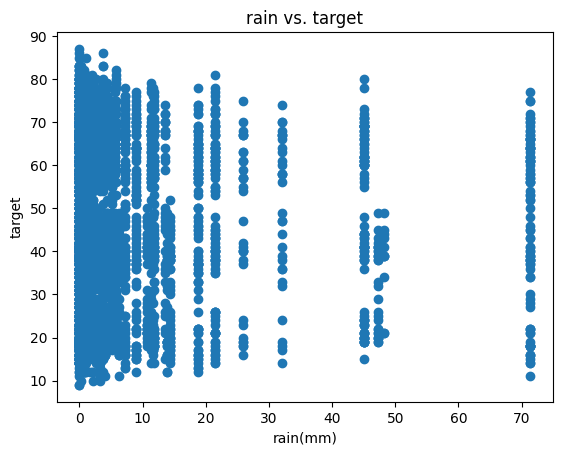

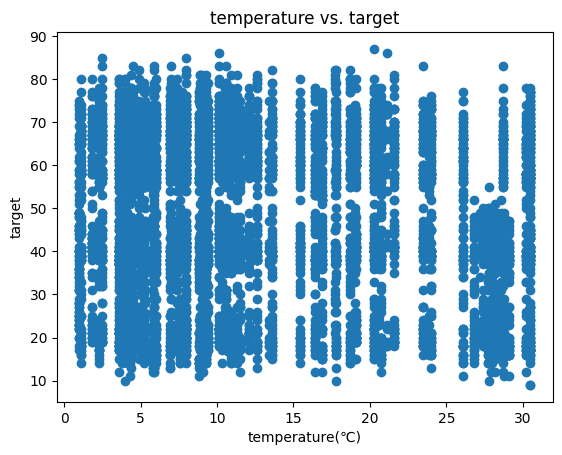

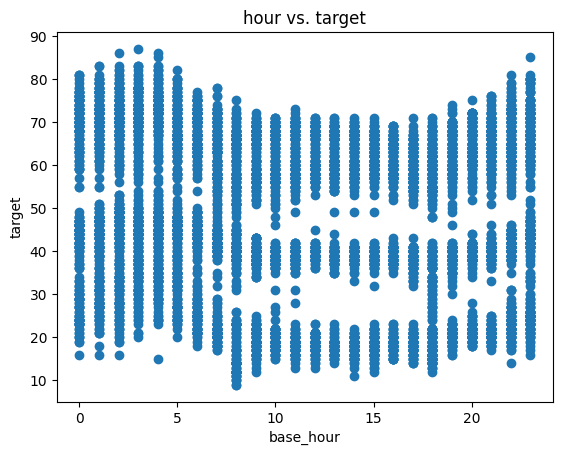

In [80]:
import matplotlib.pyplot as plt

plt.scatter(subset_df['강수량(mm)'], subset_df['target'])
plt.xlabel('rain(mm)')
plt.ylabel('target')
plt.title('rain vs. target')
plt.show()

plt.scatter(subset_df['평균기온(℃)'], subset_df['target'])
plt.xlabel('temperature(℃)')
plt.ylabel('target')
plt.title('temperature vs. target')
plt.show()

plt.scatter(subset_df['base_hour'], subset_df['target'])
plt.xlabel('base_hour')
plt.ylabel('target')
plt.title('hour vs. target')
plt.show()

- 시간대에 따라서는 뚜렷하게 평균속도의 추세가 나타난다.9-10시, 17-18시에 가장 낮은 평균이동속도를 보인다.
- target이 한 강수량, 기온에 대해 존재하는 값이 많으므로 평균, 분산을 각각 구해 다시 그래프를 그려본다.

In [91]:
df_ave = subset_df.groupby('base_date').agg(target_ave=('target', 'mean'))
df_var = subset_df.groupby('base_date').agg(target_var=('target', 'var'))
df_av = pd.merge(df_ave, df_var, left_index=True, right_index=True)
df_av = df_av.reset_index()

df_weather = pd.merge(rain,temp, on='날짜',how='outer')
df_merged = pd.merge(df_av, df_weather, left_on='base_date', right_on='날짜',how='outer')
df_merged

,base_date,target_ave,target_var,날짜,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
0,20211201,48.031250,382.935855,20211201,1.0,8.0,7.0,9.4
1,20211202,48.479167,357.010088,20211202,1.1,9.1,7.0,12.4
2,20211209,49.218750,376.277961,20211209,0.5,12.6,9.9,15.4
3,20211210,48.854167,386.652193,20211210,0.0,13.6,11.6,16.3
4,20211212,50.562500,359.848684,20211212,0.0,10.6,6.4,13.6
...,...,...,...,...,...,...,...,...
239,NaN,NaN,NaN,20220726,NaN,27.6,23.3,32.7
240,NaN,NaN,NaN,20220727,NaN,28.9,25.3,33.4
241,NaN,NaN,NaN,20220728,NaN,30.3,26.5,36.0
242,NaN,NaN,NaN,20220729,NaN,28.9,26.8,32.1


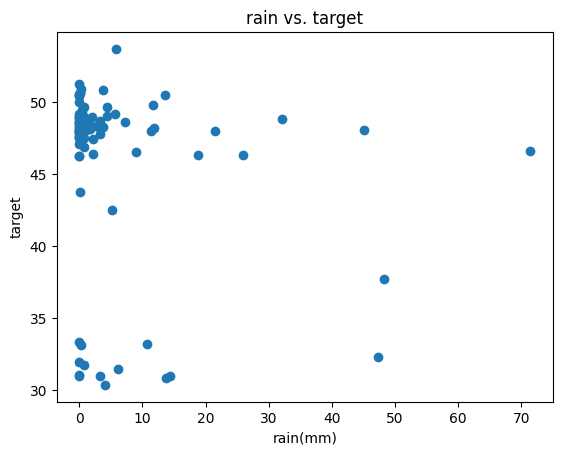

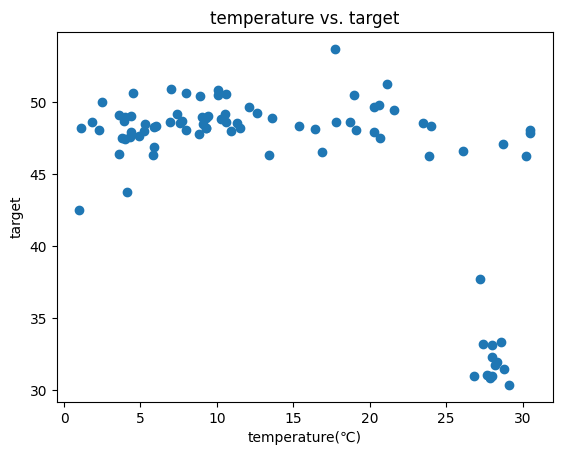

In [94]:
plt.scatter(df_merged['강수량(mm)'], df_merged['target_ave'])
plt.xlabel('rain(mm)')
plt.ylabel('target')
plt.title('rain vs. target')
plt.show()

plt.scatter(df_merged['평균기온(℃)'], df_merged['target_ave'])
plt.xlabel('temperature(℃)')
plt.ylabel('target')
plt.title('temperature vs. target')
plt.show()

- rain: 특정한 추세는 찾을 수 없지만, 40~50정도 될 때 평균속도가 급감하는 일자가 존재하는 것으로 확인된다.
- temperature: 25~30정도 될 때 평균속도가 뚜렷히 급감한다.

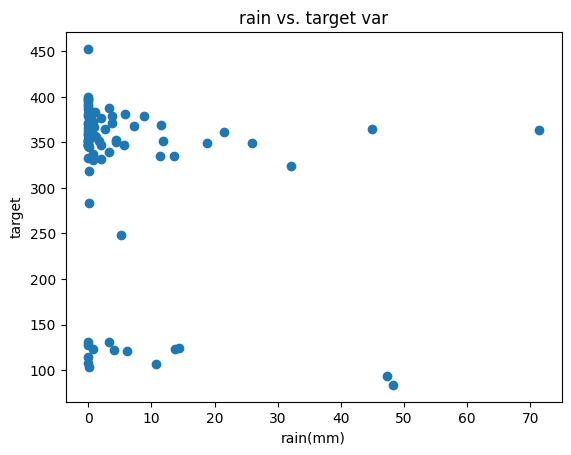

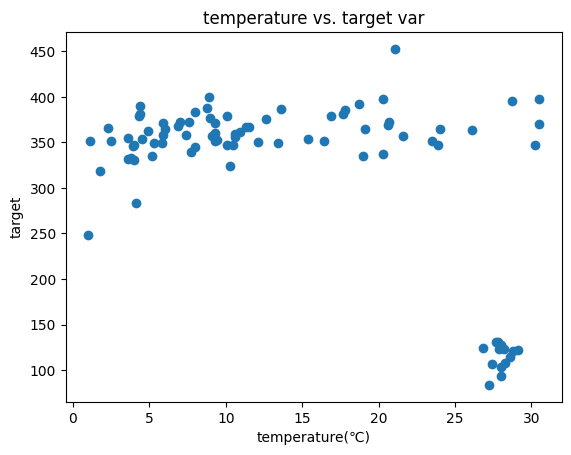

In [95]:
plt.scatter(df_merged['강수량(mm)'], df_merged['target_var'])
plt.xlabel('rain(mm)')
plt.ylabel('target')
plt.title('rain vs. target var')
plt.show()

plt.scatter(df_merged['평균기온(℃)'], df_merged['target_var'])
plt.xlabel('temperature(℃)')
plt.ylabel('target')
plt.title('temperature vs. target var')
plt.show()

- 뚜렷한 상관관계는 없어 보이나, temperature 25-30일 때 분산이 뚜렷히 낮게 나타난다. 25~30일 경우 나타났던 평균 이동속도의 낮은 값이 상당히 일정하다는 것을 의미한다.